In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/goev histrorical nasdaq.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Close/Last'] = df['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
df['Close/Last_Prev'] = df['Close/Last'].shift(1)

In [9]:
df.dropna(inplace=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[['Close/Last_Prev']], df['Close/Last'], test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test_scaled)

In [14]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.16077283375388213


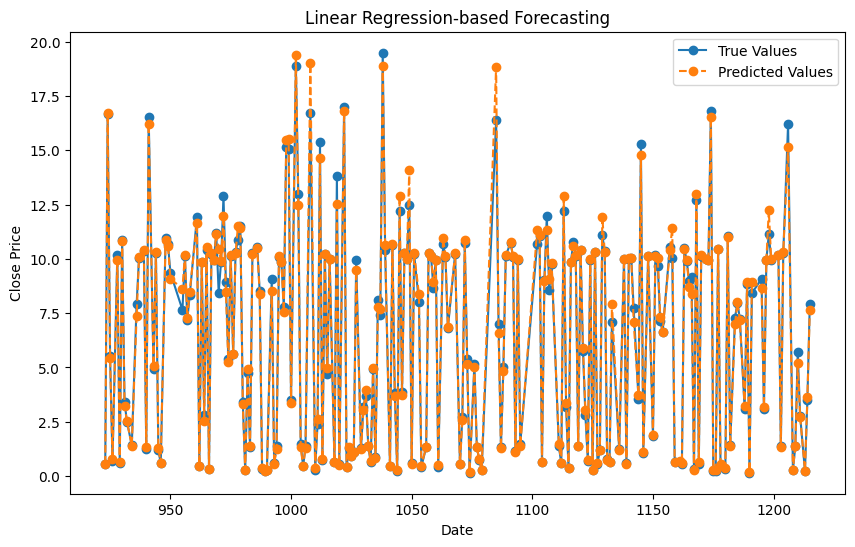

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], y_test, label='True Values', marker='o')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted Values', linestyle='--', marker='o')
plt.title('Linear Regression-based Forecasting')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['DateOrdinal'] = df['Date'].apply(lambda x: x.toordinal())

In [17]:
X = df[['DateOrdinal']]
y = df['Close/Last']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)


LinearRegression()

In [21]:
y_pred = model.predict(X_test)


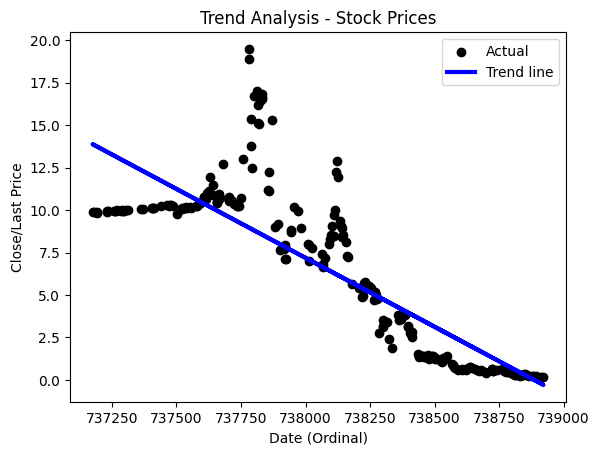

In [22]:
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Trend line')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Close/Last Price')
plt.title('Trend Analysis - Stock Prices')
plt.legend()
plt.show()

In [23]:
#demand forecasting with ARIMA model

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
df_1 = pd.read_csv('/content/goev histrorical nasdaq.csv')


In [33]:
data = df[['Date', 'Close/Last']]
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date').set_index('Date')

<ipython-input-33-f8b7c9d649ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [34]:
data['Close/Last'] = pd.to_numeric(data['Close/Last'], errors='coerce')  # coerce to handle non-numeric values


In [35]:
data = data.dropna(subset=['Close/Last'])


In [36]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [37]:
model = ARIMA(train['Close/Last'], order=(5, 1, 0))  # Adjust order based on your data
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
predictions = model_fit.forecast(steps=len(test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


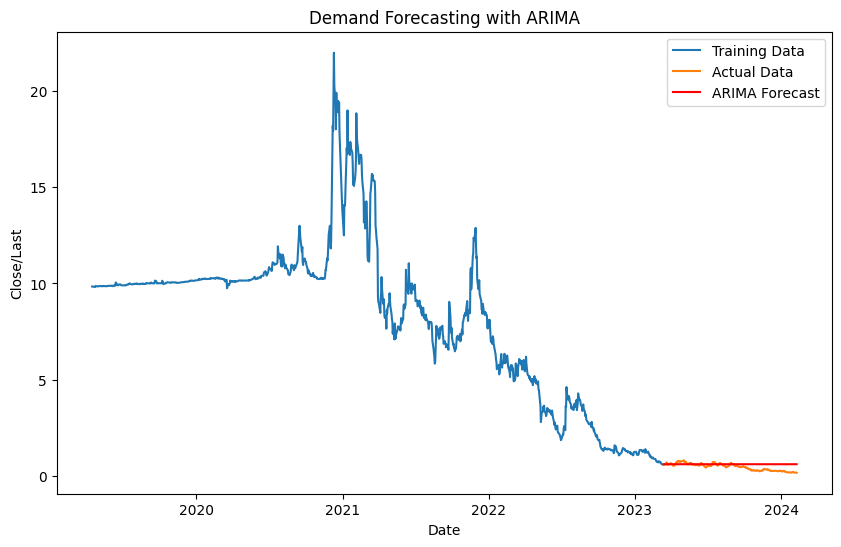

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(train['Close/Last'], label='Training Data')
plt.plot(test['Close/Last'], label='Actual Data')
plt.plot(test.index, predictions, label='ARIMA Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Close/Last')
plt.title('Demand Forecasting with ARIMA')
plt.legend()
plt.show()

In [40]:
mse = mean_squared_error(test['Close/Last'], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.05116041580862513
